# Exploring Listening Habits with personal Spotify data
Can request at [https://www.spotify.com/us/account/privacy/](https://www.spotify.com/us/account/privacy/) by clicking the "request" button at the bottom of the page

In [56]:
import numpy as np
np.random.seed(0)

import pandas as pd
import json
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

seed = 0

In [57]:
path = '/content/drive/My Drive/datasets/my_spotify_data/'

In [72]:
streaming_history = json.load(open(path+'StreamingHistory0.json', 'r'))
history = pd.DataFrame(streaming_history)

history.head(1)

,endTime,artistName,trackName,msPlayed
0,2019-05-27 22:26,OneRepublic,Stop And Stare,223853


In [74]:
history = history.rename(columns={'msPlayed':'seconds', 'artistName':'artist', 'trackName':'title', 'endTime':'date'})

history.columns

Index(['date', 'artist', 'title', 'seconds'], dtype='object')

In [60]:
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359 entries, 0 to 5358
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     5359 non-null   object
 1   artist   5359 non-null   object
 2   title    5359 non-null   object
 3   seconds  5359 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 167.6+ KB


In [61]:
import datetime as dt

fmt_date = lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M')

history['date'] = history['date'].apply(fmt_date)

In [62]:
print(f'Start of streaming: {history.date.min()} \nEnd of Streaming: {history.date.max()}')

Start of streaming: 2019-05-27 22:26:00 
End of Streaming: 2020-05-27 19:09:00


In [63]:
history['seconds'] = round(history['seconds'] / 1000)

In [64]:
history['seconds'].describe()

count    5359.000000
mean      147.095913
std       129.728260
min         0.000000
25%        19.000000
50%       179.000000
75%       219.000000
max      2866.000000
Name: seconds, dtype: float64

In [66]:
long_songs = history[history.seconds > 400]
long_songs.shape[0]

16

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d5868c1d0>]],
      dtype=object)

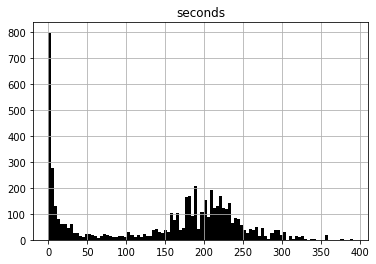

In [67]:
history.drop(long_songs.index, axis=0).hist(color='k', bins=100)

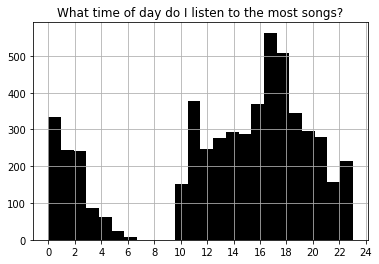

In [68]:
history['hour'] = [date.hour for date in history['date']]
plot = history['hour'].hist(color='k', bins=24)
plot.set_xticks(list(range(0, 26, 2)))
plot.grid('major')
plt.title('What time of day do I listen to the most songs?')
plt.show()

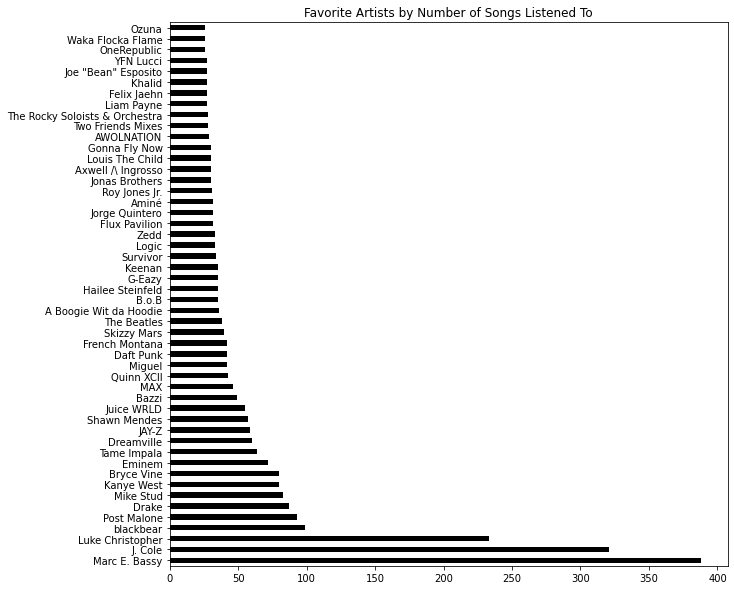

In [77]:
fav_artists = history['artist'].value_counts().sort_values(ascending=False)
fav_artists[:50].plot(kind='barh', color='k', figsize=(10,10), title='Favorite Artists by Number of Songs Listened To')

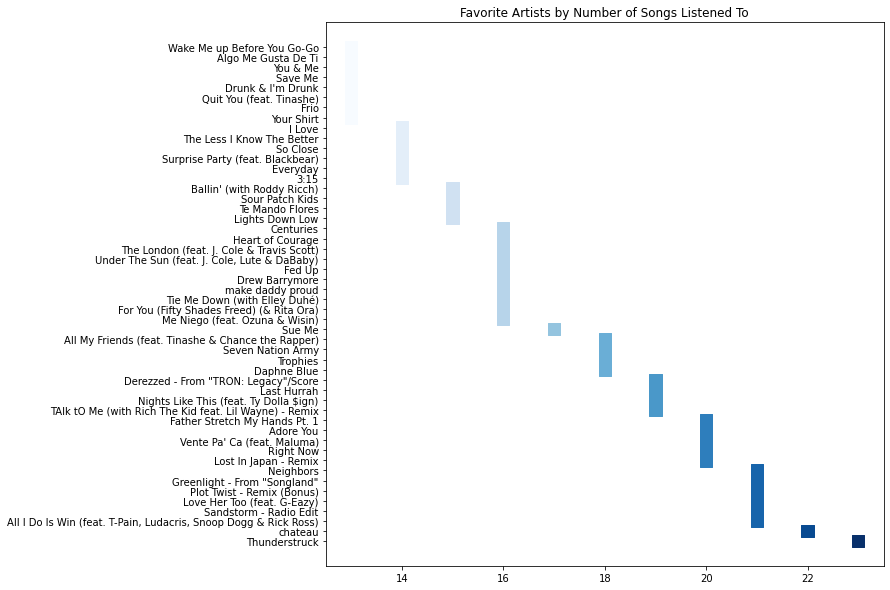

In [76]:
fav_songs = history['title'].value_counts().sort_values(ascending=False)[50:100]

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(fav_songs, fav_songs.index, c=fav_songs, marker='s', s=150, cmap='Blues')
ax.set_title('Favorite Songs by Plays')
plt.show()